<div style="text-align: center; background-color:rgb(32, 5, 129); padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 40px; font-weight: bold;">Build and optimize forecasting models to predict future sales</span>
</div>

**Car Sales Forecasting**
- Since our target column is **Price ($)**, which is a numeric/continuous value, our problem is a regression problem.
- we're trying to predict the future sale **price** of a car based on features like model, body style, engine type, etc. That’s a classic regression task.
  ---
**Evaluation Metrics:**

**R² (R-squared)** – to see how well the model explains the variance

**MAE / RMSE** – to see how close the predictions are to the actual prices  
- The mean best accuracy and best parameters got through the grid search CV
- The model performance metrics Accuracy, Precision, Recall and F1 Score
- The model Classification scores by classes
- The prediction confusion matrix
- The ROC AUC Score and the ROC Curve
--- 
models are: 

1. Random Forest
2. XGBoost
3. Decision Tree
4. Prophet (python 3.10 )

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
import joblib
import time
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate

from xgboost import XGBRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import graphviz

# **Load a dataset**
- Split the dataset into training and test sets, ensuring proper time-series validation techniques
- Use the `train_test_split` function from the `sklearn.model_selection` module to split the dataset into training and test sets. 

In [2]:
cars_sales_Model = joblib.load('Datamodeling.pkl')

In [3]:
cars_sales_Model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23089 entries, 0 to 23089
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             23089 non-null  datetime64[ns]
 1   Gender           23089 non-null  int64         
 2   Annual Income    23089 non-null  float64       
 3   Company          23089 non-null  int64         
 4   Engine           23089 non-null  int64         
 5   Transmission     23089 non-null  int64         
 6   Color            23089 non-null  int64         
 7   Price ($)        23089 non-null  float64       
 8   Body Style       23089 non-null  int64         
 9   Dealer_Region    23089 non-null  int64         
 10  Year             23089 non-null  int32         
 11  Month            23089 non-null  int32         
 12  DayOfWeek        23089 non-null  int32         
 13  Season           23089 non-null  int64         
 14  Price_to_Income  23089 non-null  float64   

In [4]:
cars_sales_Model.shape

(23089, 21)

# **Spilit the dataset**

- The `cars_sales_Model` dataset contains features and target variables for a car sales dataset.
- x is the features and y is the target variable(**price ($)**).
  

In [5]:
# Define features (X) and target (y)
x = cars_sales_Model.drop(columns=['Price ($)','Date'])
y = cars_sales_Model['Price ($)']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18471, 19)
(4618, 19)
(18471,)
(4618,)


# **Model Selection**
- The process of choosing the best model for a given problem. This involves evaluating th

## **decision tree**
- A decision tree is a type of machine learning model that uses a tree-like structure to make predictions. It works by recursively splitting the data into smaller subsets based on features and their values, and then making predictions based on the majority class in each subset.

In [7]:
Decision_Tree_Regressor= DecisionTreeRegressor(random_state=42)

## **random forest**
- A Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It works by creating multiple decision trees on different subsets of the data and then combining their predictions to make final predictions. 

In [8]:
Random_Forest_Regressor= RandomForestRegressor(n_estimators=100, random_state=42)

## **XGBoost**
- is a library for gradient boosting, a type of ensemble learning.
  

In [9]:
XGBoost_Regressor=XGBRegressor(n_estimators=120, learning_rate=0.1, max_depth=5, random_state=42)

## **Gradient Boosting**
- Gradient Boosting is an ensemble learning method that combines multiple weak learners to improve the accuracy and robustness of predictions.

In [10]:

Gradient_Boosting_Regressor=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# **Model Training**
- The model architecture used is a simple feedforward neural network with one hidden layer.
-  Split the dataset into training and test sets, ensuring proper time-series validation techniques
-  Train multiple models and assess their performance using error metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error).

## **decision tree** 

In [11]:
print("training Decision Tree...")
start_time_dt = time.time()

Decision_Tree_Regressor.fit(X_train, y_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))


training Decision Tree...
Decision Tree trained in 0.36 seconds


In [12]:
# Predict on the test set
print("training Predicting Decision Tree...")
start_time_Dpred = time.time()

y_pred_tree_test = Decision_Tree_Regressor.predict(X_test)
y_pred_tree_train = Decision_Tree_Regressor.predict(X_train)

end_time_Dpred = time.time()
print("Decision Tree trained pridiction in {:.2f} seconds".format(end_time_Dpred - start_time_Dpred))

training Predicting Decision Tree...
Decision Tree trained pridiction in 0.05 seconds


## **random forest**

In [13]:
print("training Random Forest...")
start_time_rf = time.time()

Random_Forest_Regressor.fit(X_train, y_train)

end_time_rf = time.time()
print("Random Forest trained in {:.2f} seconds".format(end_time_rf - start_time_rf))


training Random Forest...
Random Forest trained in 20.54 seconds


In [14]:
# Predict on the test set
print("training Predicting Random Forest...")
start_time_rfpred = time.time()

y_pred_rf_test = Random_Forest_Regressor.predict(X_test)
y_pred_rf_train = Random_Forest_Regressor.predict(X_train)

end_time_rfpred = time.time()
print(" random forest trained pridiction in {:.2f} seconds".format(end_time_rfpred - start_time_rfpred))

training Predicting Random Forest...
 random forest trained pridiction in 1.10 seconds


## **XGBoost**

In [15]:
print("training XGBoost...")
start_time_xb = time.time()

XGBoost_Regressor.fit(X_train, y_train)

end_time_xb = time.time()
print("xgboost trained in {:.2f} seconds".format(end_time_xb - start_time_xb))


training XGBoost...
xgboost trained in 0.88 seconds


In [16]:
# Predict on the test set
print("training Predicting xgboost...")
start_time_xbpred = time.time()

y_pred_xb_test= XGBoost_Regressor.predict(X_test)
y_pred_xb_train= XGBoost_Regressor.predict(X_train)

end_time_xbpred = time.time()
print("xgboost trained pridiction in {:.2f} seconds".format(end_time_xbpred - start_time_xbpred))

training Predicting xgboost...
xgboost trained pridiction in 0.10 seconds


## **Gradient Boosting**

In [17]:
print("training Gradient Boosting...")
start_time_gb = time.time()

Gradient_Boosting_Regressor.fit(X_train, y_train)

end_time_gb = time.time()
print("Gradient Boost trained in {:.2f} seconds".format(end_time_gb - start_time_gb))

training Gradient Boosting...
Gradient Boost trained in 10.49 seconds


In [18]:
print("training Predicting Gradient Boost...")
start_time_gbpred = time.time()

y_pred_gb_test= Gradient_Boosting_Regressor.predict(X_test)
y_pred_gb_train= Gradient_Boosting_Regressor.predict(X_train)

end_time_gbpred = time.time()
print(" Gradient Boost trained pridiction in {:.2f} seconds".format(end_time_gbpred - start_time_gbpred))

training Predicting Gradient Boost...
 Gradient Boost trained pridiction in 0.12 seconds


# **Model Evaluation and Tuning**
- Tune hyperparameters for selected models.
- Evaluate residuals to ensure that no patterns are left unmodeled.


## healper functions

In [19]:
def print_regression_metrics(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Results:")
        print(f"R-squared: {r2_score(y_train, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        accuracy = np.mean(np.abs((y_train - pred) / y_train) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")
        
    else:
        pred = clf.predict(X_test)
        print("Test Results:")
        print(f"R-squared: {r2_score(y_test, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        accuracy = np.mean(np.abs((y_test - pred) / y_test) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")


In [20]:
def plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel("Actual Car Sales")
    plt.ylabel("Predicted Car Sales")
    plt.title(title)
    plt.show()

In [21]:
def plot_residuals(y_test, y_pred, title='Residual Plot'):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()
    
    # Also, residuals vs. predicted values:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Car Sales")
    plt.ylabel("Residual")
    plt.title(title + " (vs. predicted)")
    plt.show()

## **decision tree**

In [22]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 1.0
Mean Absolute Error: 9.96457809822249e-17
Mean Squared Error: 1.1217346624392729e-31
Root Mean Squared Error: 3.3492307511416303e-16
Accuracy-like Measure (within 10%): 100.00%
Test Results:
R-squared: 0.989928301377354
Mean Absolute Error: 0.02906624224959149
Mean Squared Error: 0.010205642216425396
Root Mean Squared Error: 0.10102297865547916
Accuracy-like Measure (within 10%): 85.77%


In [23]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [24]:
final_model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=30)

# Evaluate final model on the test set
print("training Decision Tree...")
start_time_dt = time.time()

final_model.fit(X_train, y_train)
final_pred_test = final_model.predict(X_test)
final_pred_train = final_model.predict(X_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))

training Decision Tree...
Decision Tree trained in 0.19 seconds


In [25]:
# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 0.9930168698942505
Mean Absolute Error: 0.03628748134807171
Mean Squared Error: 0.006959525491662279
Root Mean Squared Error: 0.08342377054330666
Accuracy-like Measure (within 10%): 78.36%
Test Results:
R-squared: 0.9859695333134183
Mean Absolute Error: 0.049929670430809835
Mean Squared Error: 0.014217057965849813
Root Mean Squared Error: 0.11923530503105954
Accuracy-like Measure (within 10%): 72.85%


In [26]:
k = 5

# Apply k-fold cross-validation to the model
cv_scores = cross_val_score(final_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"Cross-Validation RMSE for each fold: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f}")
print(f"Standard Deviation of RMSE: {rmse_scores.std():.2f}")


Cross-Validation RMSE for each fold: [0.11865932 0.14337714 0.13037694 0.11515371 0.12483844]
Mean RMSE: 0.13
Standard Deviation of RMSE: 0.01


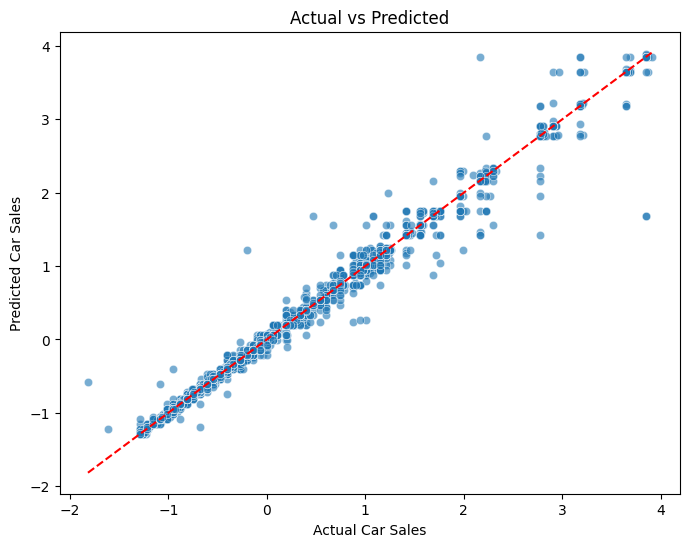

In [27]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_tree_test)


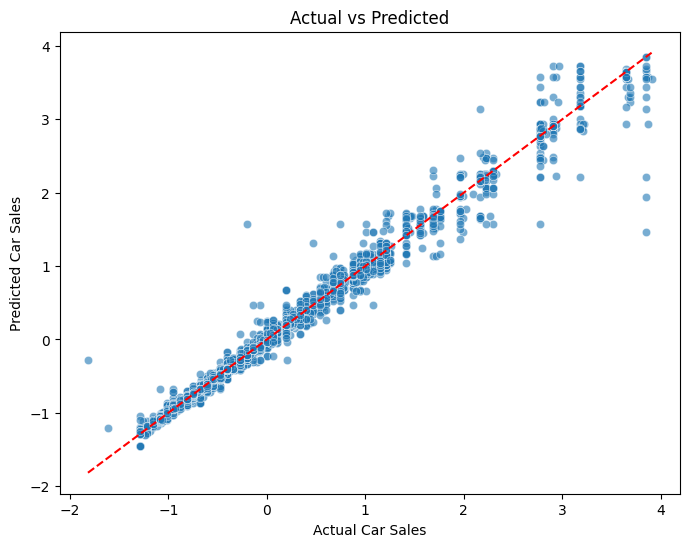

In [28]:
plot_actual_vs_predicted(y_test=y_test, y_pred=final_pred_test)

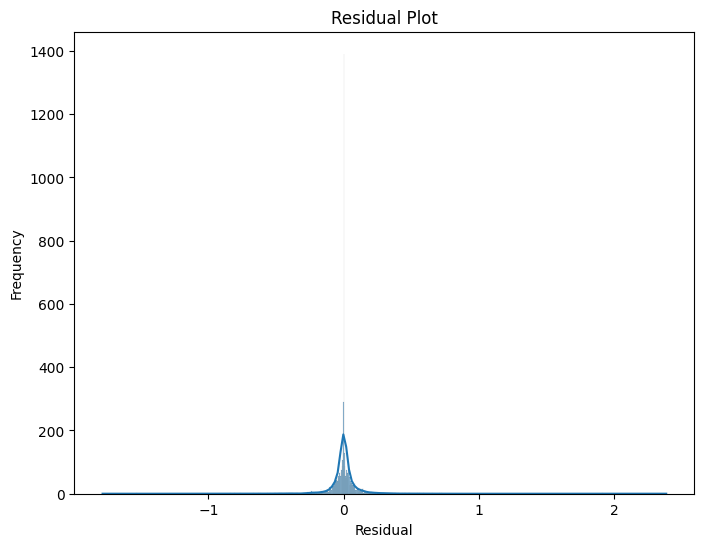

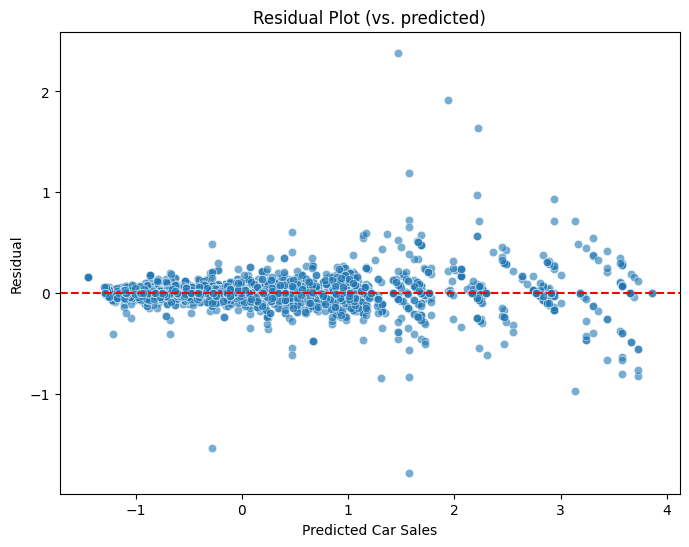

In [29]:
plot_residuals(y_test=y_test, y_pred=final_pred_test)


## Random Forest

In [30]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9995970714364593
Mean Absolute Error: 0.005753859792620927
Mean Squared Error: 0.00040156657069473546
Root Mean Squared Error: 0.020039125996278766
Accuracy-like Measure (within 10%): 97.39%
Test Results:
R-squared: 0.9971376015909211
Mean Absolute Error: 0.014475759466484755
Mean Squared Error: 0.0029004654664944044
Root Mean Squared Error: 0.0538559696458471
Accuracy-like Measure (within 10%): 92.83%


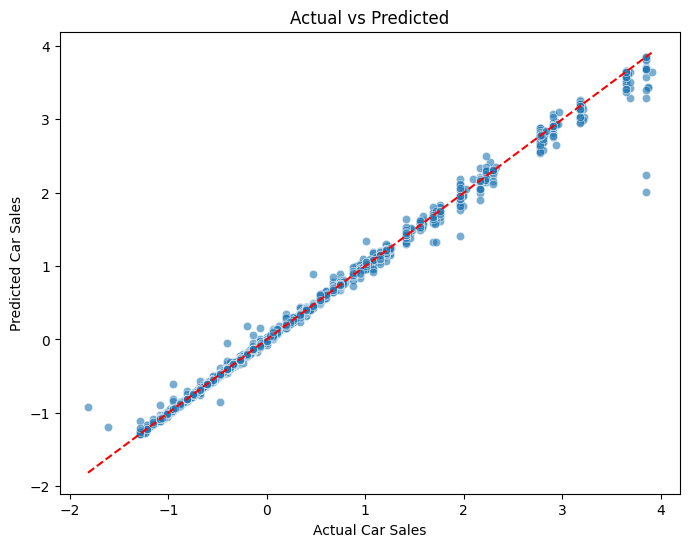

In [31]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_rf_test)


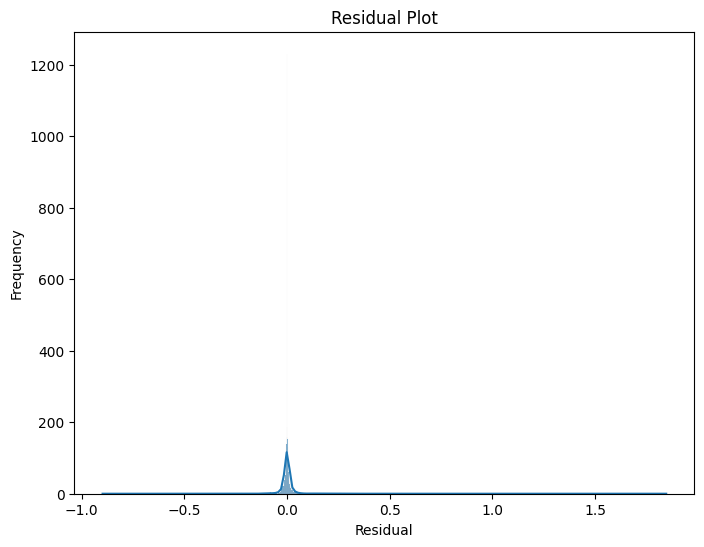

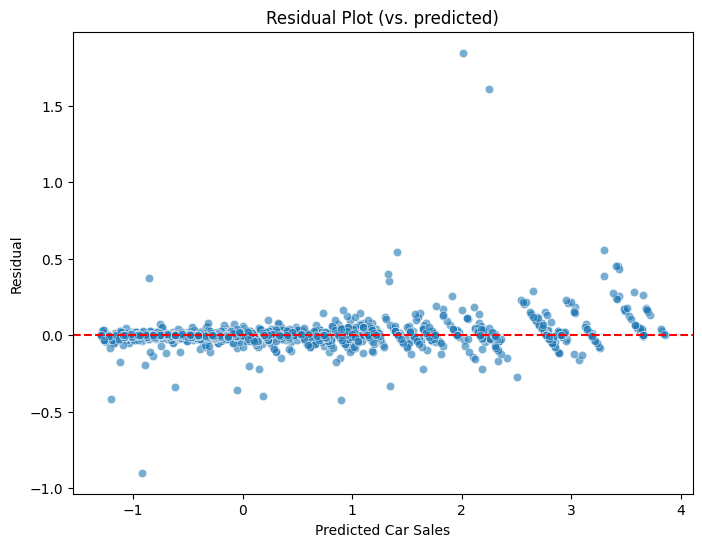

In [32]:
plot_residuals(y_test=y_test, y_pred=y_pred_rf_test)

## ****XGBoost****

In [33]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9971423107633179
Mean Absolute Error: 0.028828556249973405
Mean Squared Error: 0.0028480295782493327
Root Mean Squared Error: 0.05336693337872556
Accuracy-like Measure (within 10%): 82.63%
Test Results:
R-squared: 0.9958612254082774
Mean Absolute Error: 0.032327239232752734
Mean Squared Error: 0.004193816185343332
Root Mean Squared Error: 0.064759680244295
Accuracy-like Measure (within 10%): 81.07%


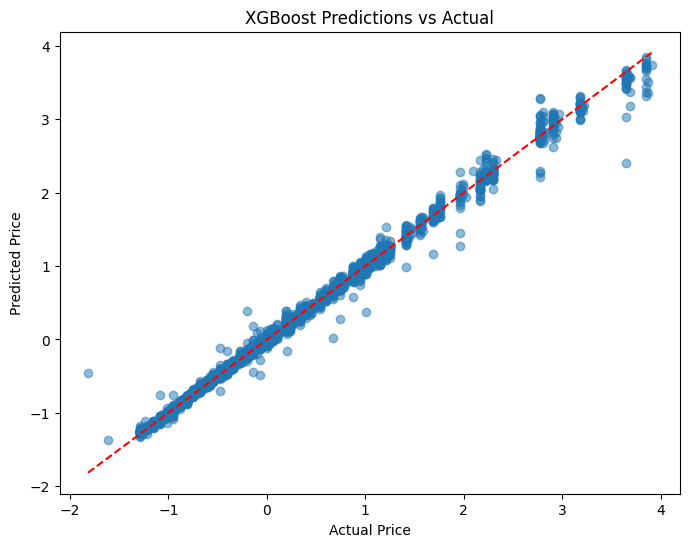

In [34]:

# XGBoost predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xb_test, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_xb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features for training each tree
}

random_search = RandomizedSearchCV(XGBoost_Regressor, param_distributions=param_grid_xb, n_iter=30, 
                                   cv=5, n_jobs=-1, verbose=3)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=120,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [36]:
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9990257757798715
Mean Absolute Error: 0.016260604166540203
Mean Squared Error: 0.0009709311142573072
Root Mean Squared Error: 0.031159767557818966
Accuracy-like Measure (within 10%): 89.45%
Test Results:
R-squared: 0.9969962656832578
Mean Absolute Error: 0.0226487177835646
Mean Squared Error: 0.0030436810014293023
Root Mean Squared Error: 0.05516956589850334
Accuracy-like Measure (within 10%): 87.31%


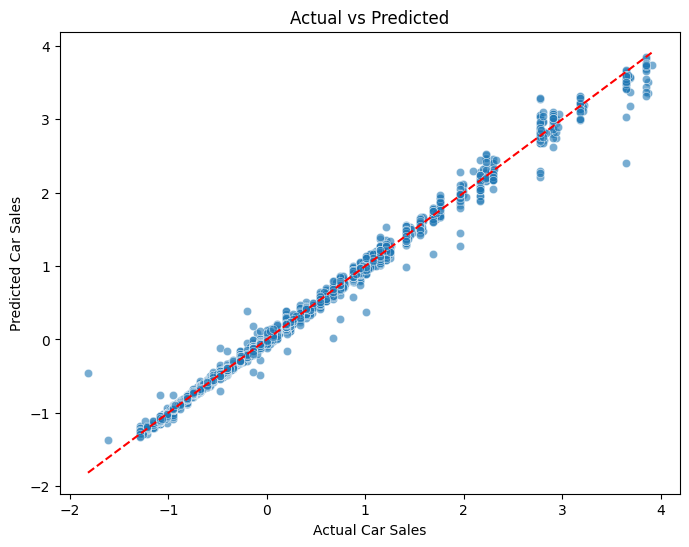

In [37]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_xb_test)


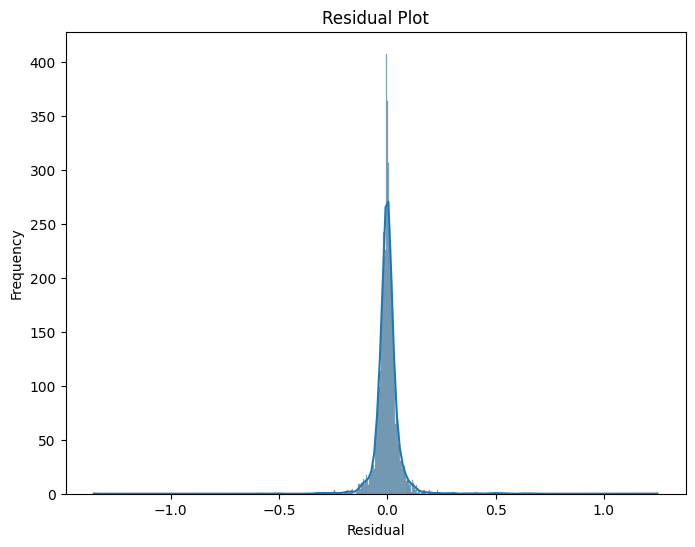

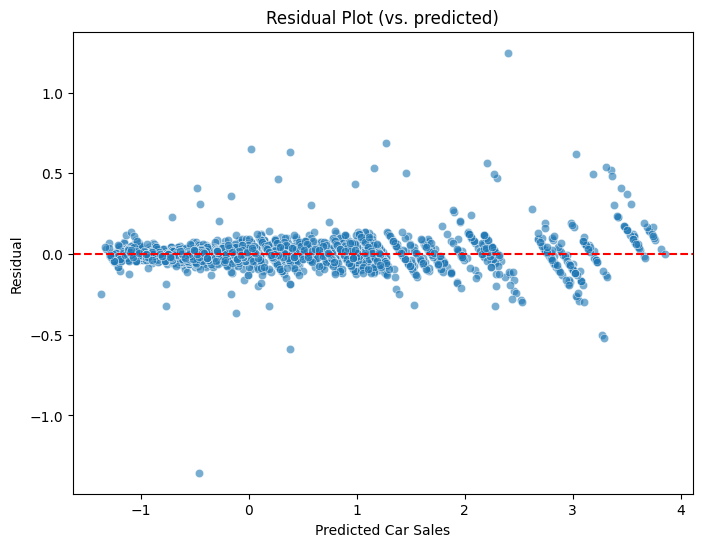

In [38]:
plot_residuals(y_test=y_test, y_pred=y_pred_xb_test)


## **Gradient Boosting**

In [39]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.998714085517201
Mean Absolute Error: 0.023679594747030977
Mean Squared Error: 0.001281567790892065
Root Mean Squared Error: 0.035798991478700415
Accuracy-like Measure (within 10%): 84.91%
Test Results:
R-squared: 0.9978531905687573
Mean Absolute Error: 0.02812704731479991
Mean Squared Error: 0.002175359865598798
Root Mean Squared Error: 0.04664075327006199
Accuracy-like Measure (within 10%): 82.70%


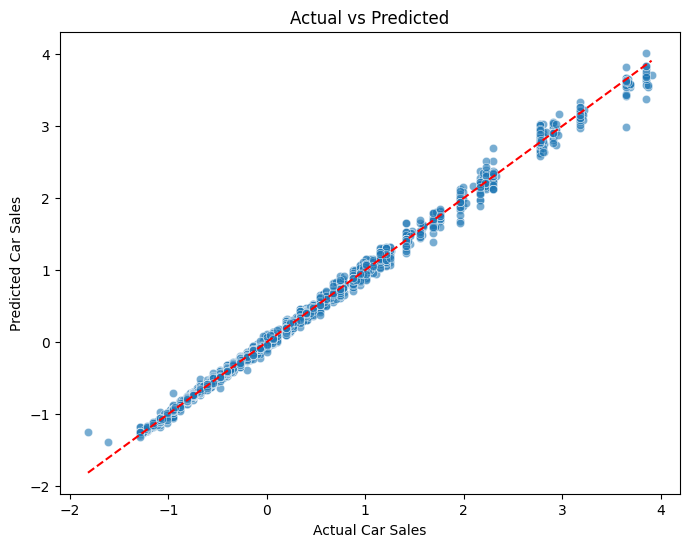

In [40]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_gb_test)   


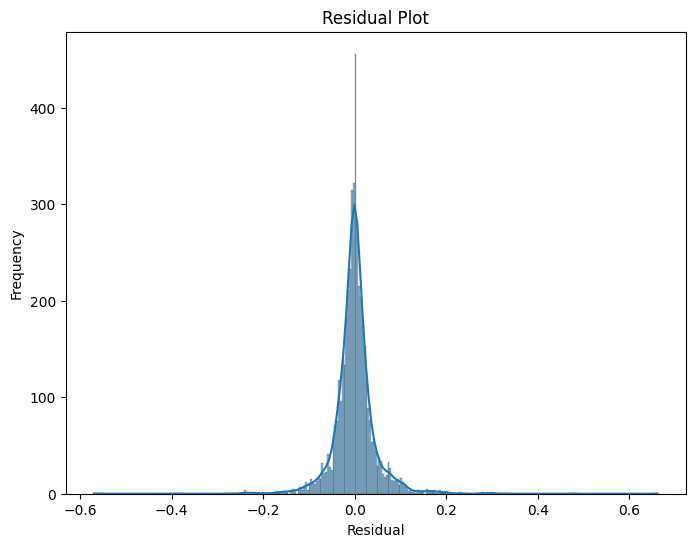

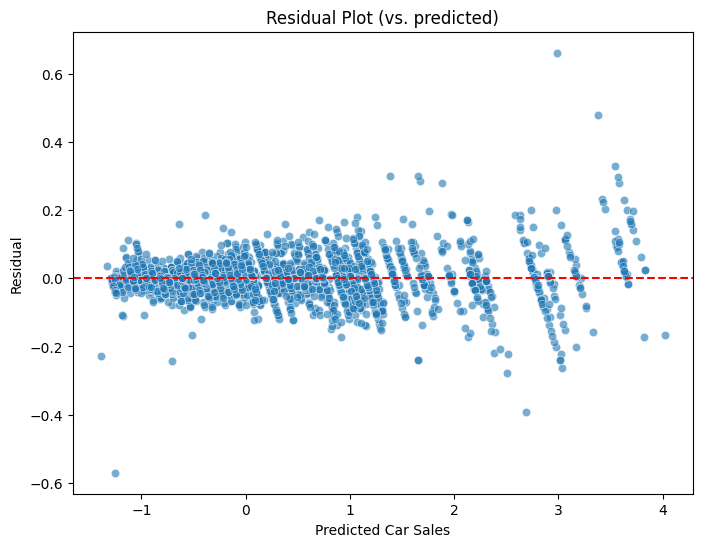

In [41]:
plot_residuals(y_test=y_test, y_pred=y_pred_gb_test)

## 

# **Comparison and Best Model**
- Compare the models' performance and choose the best-performing model based on evaluation metrics.


In [42]:
results = {
    'Model': ['Gradient Boost', 'Decision Tree', 'XGBoost', 'Random Forest'],
    
    'R² Train': [
        r2_score(y_train, y_pred_gb_train),
        r2_score(y_train, final_pred_train),
        r2_score(y_train, y_pred_xb_train),
        r2_score(y_train, y_pred_rf_train)
    ],
    
    'R² Test': [
        r2_score(y_test, y_pred_gb_test),
        r2_score(y_test, final_pred_test),
        r2_score(y_test, y_pred_xb_test),
        r2_score(y_test, y_pred_rf_test)
    ],
    
    'MAE Train': [
        mean_absolute_error(y_train, y_pred_gb_train),
        mean_absolute_error(y_train, final_pred_train),
        mean_absolute_error(y_train, y_pred_xb_train),
        mean_absolute_error(y_train, y_pred_rf_train)
    ],
    
    'MAE Test': [
        mean_absolute_error(y_test, y_pred_gb_test),
        mean_absolute_error(y_test, final_pred_test),
        mean_absolute_error(y_test, y_pred_xb_test),
        mean_absolute_error(y_test, y_pred_rf_test)
    ],
    
    'RMSE Train': [
        np.sqrt(mean_squared_error(y_train, y_pred_gb_train)),
        np.sqrt(mean_squared_error(y_train, final_pred_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_xb_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
    ],
    
    'RMSE Test': [
        np.sqrt(mean_squared_error(y_test, y_pred_gb_test)),
        np.sqrt(mean_squared_error(y_test, final_pred_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_xb_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
    ],
    'Time Train': [
        end_time_gb - start_time_gb,
        end_time_dt - start_time_dt,
        end_time_xb - start_time_xb,
        end_time_rf - start_time_rf
    ],
}

# Create and display the DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)


                R² Train   R² Test  MAE Train  MAE Test  RMSE Train  \
Model                                                                 
Gradient Boost  0.998714  0.997853   0.023680  0.028127    0.035799   
Decision Tree   0.993017  0.985970   0.036287  0.049930    0.083424   
XGBoost         0.997142  0.995861   0.028829  0.032327    0.053367   
Random Forest   0.999597  0.997138   0.005754  0.014476    0.020039   

                RMSE Test  Time Train  
Model                                  
Gradient Boost   0.046641   10.494139  
Decision Tree    0.119235    0.190922  
XGBoost          0.064760    0.878808  
Random Forest    0.053856   20.537178  


In [57]:
results_df.sort_values(by='R² Train', ascending=True, inplace=False)


,R² Train,R² Test,MAE Train,MAE Test,RMSE Train,RMSE Test,Time Train
Model,,,,,,,
Decision Tree,0.993017,0.985970,0.036287,0.049930,0.083424,0.119235,0.190922
XGBoost,0.997142,0.995861,0.028829,0.032327,0.053367,0.064760,0.878808
Gradient Boost,0.998714,0.997853,0.023680,0.028127,0.035799,0.046641,10.494139
Random Forest,0.999597,0.997138,0.005754,0.014476,0.020039,0.053856,20.537178


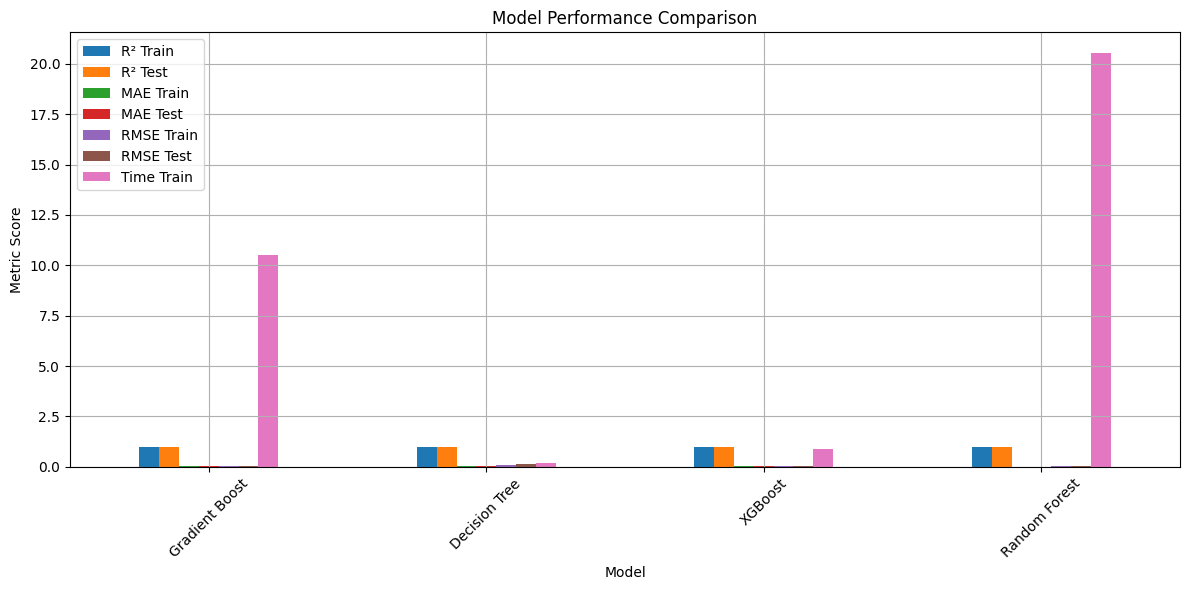

In [44]:
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:

reg_models = {
    'Decision Tree': Decision_Tree_Regressor,
    'Random Forest': Random_Forest_Regressor,
    'XGBoost': XGBoost_Regressor,
    'Gradient Boosting': Gradient_Boosting_Regressor
}
scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'mape': make_scorer(mean_absolute_percentage_error)
}


regression_results = {}

for name, model in reg_models.items():
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    regression_results[name] = {
        'R2 Mean': scores['test_r2'].mean(),
        'MSE Mean': scores['test_mse'].mean(),
        'MAE Mean': scores['test_mae'].mean(),
        'MAPE Mean': scores['test_mape'].mean()
    }


for model, metrics in regression_results.items():
    print(f"\n Model: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
cros_results = pd.DataFrame(regression_results)



 Model: Decision Tree
R2 Mean: 0.9920
MSE Mean: 0.0080
MAE Mean: 0.0267
MAPE Mean: 0.1605

 Model: Random Forest
R2 Mean: 0.9972
MSE Mean: 0.0028
MAE Mean: 0.0139
MAPE Mean: 0.0555

 Model: XGBoost
R2 Mean: 0.9955
MSE Mean: 0.0045
MAE Mean: 0.0333
MAPE Mean: 0.2004

 Model: Gradient Boosting
R2 Mean: 0.9973
MSE Mean: 0.0027
MAE Mean: 0.0286
MAPE Mean: 0.1806


In [46]:
print(cros_results)

           Decision Tree  Random Forest   XGBoost  Gradient Boosting
R2 Mean         0.991973       0.997229  0.995500           0.997300
MSE Mean        0.008004       0.002772  0.004473           0.002691
MAE Mean        0.026675       0.013908  0.033350           0.028617
MAPE Mean       0.160529       0.055465  0.200432           0.180561


In [47]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_pred_gb_test.shape)
print(y_pred_tree_test.shape)
print(y_pred_xb_test.shape)
print(y_pred_rf_test.shape)
print(y_pred_gb_train.shape)
print(y_pred_tree_train.shape)  
print(y_pred_xb_train.shape)
print(y_pred_rf_train.shape)
print(cros_results.shape)


(4618, 19)
(4618,)
(18471, 19)
(18471,)
(4618,)
(4618,)
(4618,)
(4618,)
(18471,)
(18471,)
(18471,)
(18471,)
(4, 4)


In [48]:
def plot_learning_curve(model, X, y, title='Learning Curve', ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def plot_dashboard(y_test, y_pred, model_name='Model'):

    residuals = y_test - y_pred

    # ---- Dashboard ----
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))

    # Plot: Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axs, alpha=0.5)
    axs.axhline(0, color='red', linestyle='--')
    axs.set_title(f'Residual Plot: {model_name}')
    axs.set_xlabel('Predicted Values')
    axs.set_ylabel('Residuals')
    axs.grid(True)

    plt.tight_layout()
    plt.show()


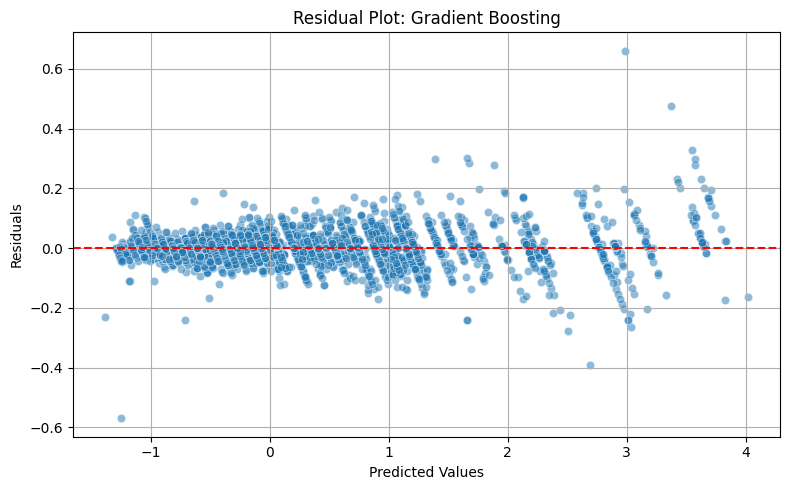

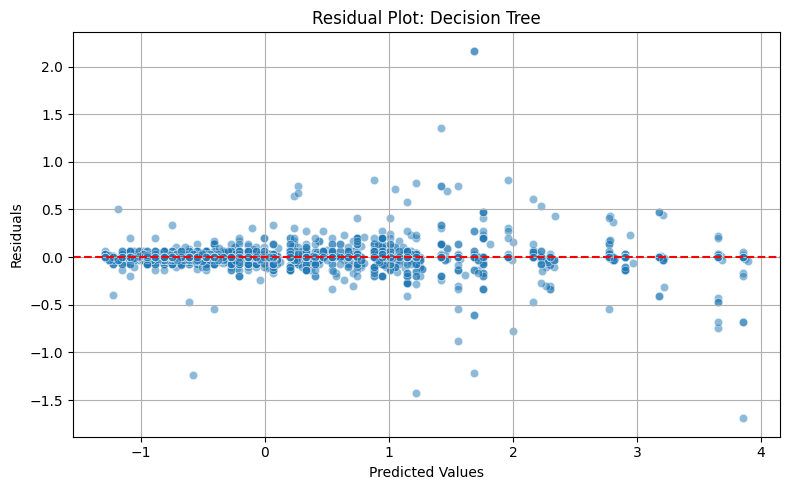

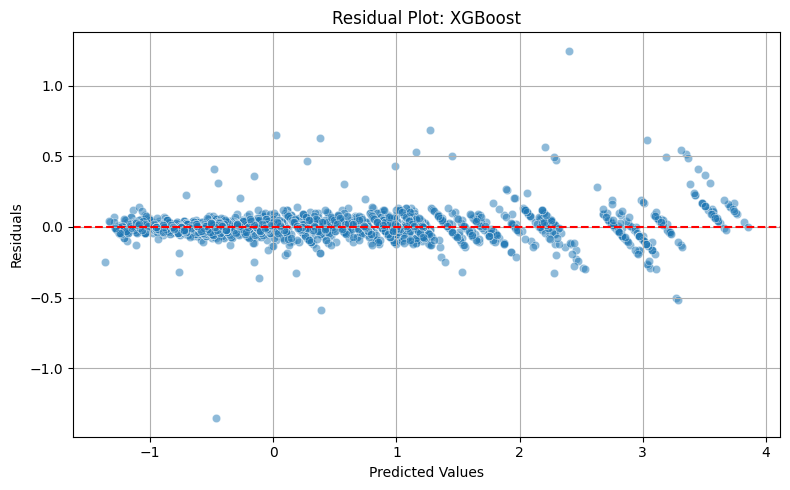

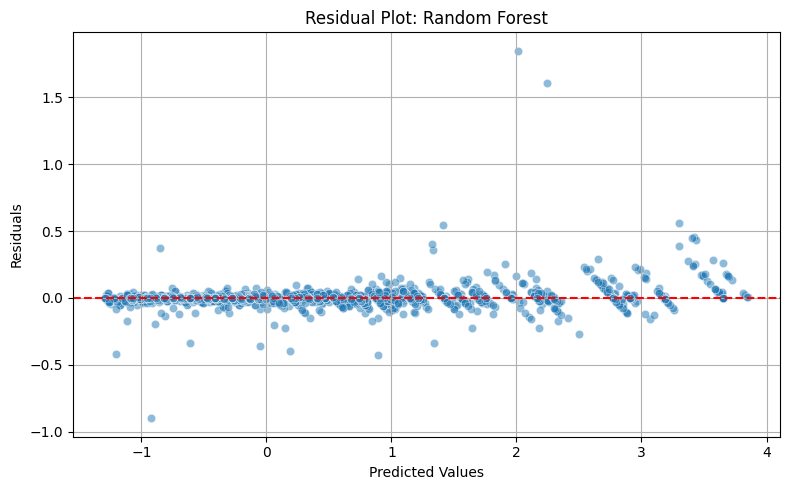

In [49]:
plot_dashboard(y_test, y_pred_gb_test, model_name='Gradient Boosting')
plot_dashboard(y_test, y_pred_tree_test, model_name='Decision Tree')
plot_dashboard(y_test, y_pred_xb_test, model_name='XGBoost')
plot_dashboard(y_test, y_pred_rf_test, model_name='Random Forest')


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tqdm import tqdm


print("\n Cross-Validated RMSE for Regression Models:")
cv_results = {}
regression_models = {
    'Decision Tree': Decision_Tree_Regressor,
    'Random Forest': Random_Forest_Regressor,
    'XGBoost': XGBoost_Regressor,
    'Gradient Boosting': Gradient_Boosting_Regressor
}

for name, model in tqdm(regression_models.items()):
    pipeline = Pipeline(steps=[
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train,
                             scoring='neg_root_mean_squared_error', cv=5)
    rmse = -np.mean(scores)
    cv_results[name] = rmse
    print(f"{name:<20}: CV RMSE = {rmse:.2f}")


 Cross-Validated RMSE for Regression Models:


 25%|██▌       | 1/4 [00:01<00:05,  1.96s/it]

Decision Tree       : CV RMSE = 0.10


 50%|█████     | 2/4 [01:07<01:18, 39.12s/it]

Random Forest       : CV RMSE = 0.06


 75%|███████▌  | 3/4 [01:10<00:22, 22.93s/it]

XGBoost             : CV RMSE = 0.07


100%|██████████| 4/4 [01:44<00:00, 26.17s/it]

Gradient Boosting   : CV RMSE = 0.05


# **Save the models**

In [50]:
#joblib.dump(Random_Forest_Regressor, 'Random_Forest_Regressor.pkl')
#joblib.dump(XGBoost_Regressor, 'XGBoost_Regressor.pkl')
#joblib.dump(Gradient_Boosting_Regressor, 'Gradient_Boosting_Regressor.pkl')
#joblib.dump(final_model, 'Desision_tree_Regressor.pkl')

# 


<head>
    <title>Team Credits</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color:rgba(23, 20, 20, 0.74);
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }
        .container {
            text-align: center;
            background-color:rgb(4, 88, 140);
            padding: 40px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            max-width: 1100px;
            width: 100%;
        }
        h1 {
            color: #333;
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h3 {
            color: #333;
            font-size: 1.5em;
            margin: 20px 0;
        }
        ul {
            list-style: none;
            padding: 0;
            margin: 20px 0;
        }
        ul li {
            font-size: 1.2em;
            margin: 10px 0;
        }
        ul li a {
            color: #333;
            text-decoration: none;
            transition: color 0.3s;
        }
        ul li a:hover {
            color: #007bff;
        }
        .github-section {
            margin-top: 30px;
        }
        .github-section p {
            color: #333;
            font-size: 1.1em;
            margin-bottom: 10px;
        }
        .github-section a img {
            width: 50px;
            height: 50px;
            transition: transform 0.3s;
        }
        .github-section a img:hover {
            transform: scale(1.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Thank You for Your Time and Efforts!</h1>
        <h3>This Work Done By Our Team:</h3>
        <ul>
            <li><a href="https://github.com/youssef-113" target="_blank">Youssef Bassiony Abdlah</a></li>
            <li><a href="https://github.com/AhmedGamall-1" target="_blank">Ahmed Gamall</a></li>
            <li><a href="https://github.com/Begad" target="_blank">Begad Abdelghafar</a></li>
            <li><a href="https://github.com/MustafaNasser005" target="_blank">Mustafa Nasser</a></li>
            <li><a href="https://github.com/mohamedamr21c" target="_blank">Mohammed Amr </a></li>
        </ul>
        <div class="github-section">
            <p>For GitHub Repository</p>
            <a href="https://github.com/AhmedGamall-1/Sales-forcasting-and-optmization/tree/main" title="Redirect to GitHub" target="_blank">
                <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub">
            </a>
        </div>

</body>
